In [ ]:
!pip install finance-datareader

In [81]:
import FinanceDataReader as fdr

In [82]:
df_krx = fdr.StockListing('KRX')[['Code','Name']]
df_krx.head()

,Code,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,051910,LG화학


In [83]:
cor_list = ['DB하이텍', '에코프로', '제주은행', '카카오']

In [84]:
cor_df = df_krx[df_krx['Name'].isin(cor_list)]
cor_df

,Code,Name
10,035720,카카오
54,086520,에코프로
137,000990,DB하이텍
367,006220,제주은행


In [ ]:
# API 사용할 때 이렇게 for문으로 conocat해줌!!(list append하는 느낌)

In [85]:
import pandas as pd

result = pd.DataFrame()
for idx, values in cor_df.iterrows():
  df = fdr.DataReader(values['Code'],'2018')
  df['Name'] = values['Name']
  result = pd.concat([result, df])

In [86]:
result['Name'].unique()

array(['카카오', '에코프로', 'DB하이텍', '제주은행'], dtype=object)

In [87]:
result.head()

,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2018-01-02,28100,29504,28000,29405,1345951,0.069350,카카오
2018-01-03,30205,30306,29203,29906,1154361,0.017038,카카오
2018-01-04,30608,31911,30006,31311,2265019,0.046981,카카오
2018-01-05,31510,31711,30507,31311,1067202,0.000000,카카오
2018-01-08,32215,32616,31713,32014,1577403,0.022452,카카오


In [88]:
Changes = pd.pivot_table(index = result.index, columns = 'Name', values = 'Change', data = result)
Changes.head()

Name,DB하이텍,에코프로,제주은행,카카오
Date,,,,
2018-01-02,-0.012500,0.007607,-0.015365,0.069350
2018-01-03,0.004219,-0.041560,-0.002863,0.017038
2018-01-04,0.033613,-0.028908,0.005743,0.046981
2018-01-05,-0.028455,0.033824,-0.002855,0.000000
2018-01-08,0.020921,-0.023577,-0.001432,0.022452


In [89]:
cum_ror_df = (Changes + 1).cumprod() - 1
cum_ror = cum_ror_df.iloc[-1]
print(cum_ror)

Name
DB하이텍    3.216667
에코프로     7.900565
제주은행     1.737525
카카오      1.352898
Name: 2023-02-16 00:00:00, dtype: float64


In [90]:
start_date = Changes.index[0]
end_date = Changes.index[-1]

year = (end_date - start_date).days / 365
print(year)

5.126027397260274


In [91]:
CAGR = (1 + cum_ror) ** (1/year) - 1 # 해당연도에 따른 예상수익률
print(CAGR)

Name
DB하이텍    0.324100
에코프로     0.531846
제주은행     0.217085
카카오      0.181662
Name: 2023-02-16 00:00:00, dtype: float64


In [92]:
daily_std = Changes.std() # 일 표준편차
annual_std = daily_std * np.sqrt(252) # 연 표준편차
print(daily_std, annual_std)

Name
DB하이텍    0.030608
에코프로     0.037330
제주은행     0.033951
카카오      0.024054
dtype: float64 Name
DB하이텍    0.485881
에코프로     0.592599
제주은행     0.538962
카카오      0.381845
dtype: float64


In [93]:
# 연평균수익률 = Changes.mean() * 252
# 공분산_일 = Changes.cov()
# 공분산_년 = 공분산_일 * 252
# print(연평균수익률, 공분산_년)

In [94]:
# 종목이 4 -> 100%
# 경우의 수가 많다. -> 

# 전체 비중이 100%을 넘으면 안된다.
# 우리가 계산해야할 경우는 많다.

포트폴리오_비중_리스트 = []
포트폴리오_수익률_리스트 = []
포트폴리오_리스크_리스트 = []

import numpy as np

for i in range(20000):
  # 포트폴리오의 비중
  weights = np.random.random(4)
  비중 = weights / weights.sum() # 합이 1이되게끔 바꿔줌
  # 포트폴리오의 수익률
  포트폴리오_수익률 = (CAGR * 비중).sum()
  # 포트폴리오의 리스크
  리스크 = (annual_std * 비중).sum()

  포트폴리오_비중_리스트.append(비중)
  포트폴리오_수익률_리스트.append(포트폴리오_수익률)
  포트폴리오_리스크_리스트.append(리스크)

In [95]:
# 각 종목을 데이터프레임에 넣습니다.
포트폴리오 = pd.DataFrame(포트폴리오_비중_리스트)
포트폴리오.columns = Changes.columns
포트폴리오.head()

Name,DB하이텍,에코프로,제주은행,카카오
0,0.229677,0.014623,0.479561,0.276139
1,0.231403,0.202840,0.401394,0.164363
2,0.199873,0.341116,0.116374,0.342637
3,0.205055,0.417294,0.194280,0.183371
4,0.122146,0.552146,0.068442,0.257265


In [96]:
포트폴리오['수익률'] = 포트폴리오_수익률_리스트
포트폴리오['리스크'] = 포트폴리오_리스크_리스트
포트폴리오.head()

Name,DB하이텍,에코프로,제주은행,카카오,수익률,리스크
0,0.229677,0.014623,0.479561,0.276139,0.236485,0.484169
1,0.231403,0.202840,0.401394,0.164363,0.299873,0.511735
2,0.199873,0.341116,0.116374,0.342637,0.333707,0.492815
3,0.205055,0.417294,0.194280,0.183371,0.363881,0.521649
4,0.122146,0.552146,0.068442,0.257265,0.394838,0.521673


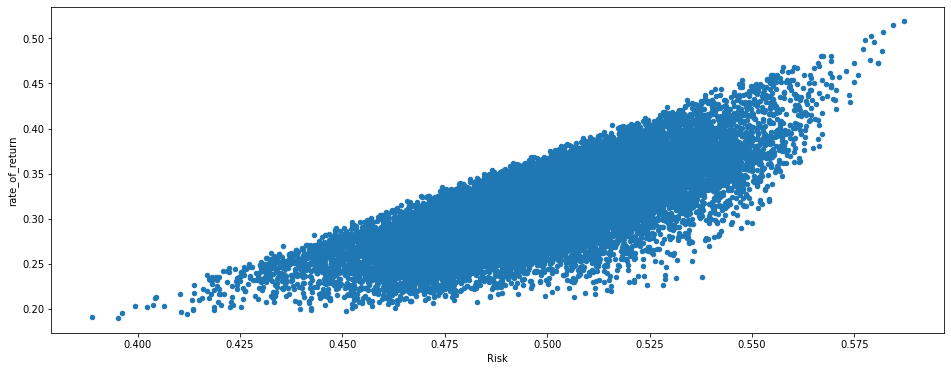

In [97]:
포트폴리오.plot.scatter(x = '리스크', y = '수익률', figsize = (16,6), xlabel = 'Risk', ylabel = 'rate_of_return')

In [98]:
포트폴리오.sort_values('수익률',ascending = False)

Name,DB하이텍,에코프로,제주은행,카카오,수익률,리스크
4067,0.007081,0.958465,0.015271,0.019183,0.518851,0.586982
15017,0.074637,0.922105,0.002705,0.000552,0.515295,0.584373
11361,0.046276,0.908026,0.025240,0.020458,0.507124,0.581995
14576,0.022538,0.903954,0.027148,0.046360,0.502384,0.578967
14759,0.056724,0.878808,0.029790,0.034678,0.498541,0.577639
...,...,...,...,...,...,...
17063,0.014982,0.021179,0.144063,0.819777,0.196316,0.410502
2731,0.051420,0.013724,0.038528,0.896329,0.195157,0.396140
11944,0.020920,0.012049,0.162586,0.804445,0.194621,0.412106
14967,0.046392,0.008354,0.002825,0.942430,0.191296,0.388876


In [99]:
포트폴리오.sort_values('리스크')

Name,DB하이텍,에코프로,제주은행,카카오,수익률,리스크
14967,0.046392,0.008354,0.002825,0.942430,0.191296,0.388876
8298,0.002682,0.015468,0.063482,0.918368,0.189710,0.395358
2731,0.051420,0.013724,0.038528,0.896329,0.195157,0.396140
17421,0.117813,0.010837,0.019161,0.852189,0.202917,0.399396
18030,0.088406,0.015277,0.051638,0.844680,0.201433,0.402375
...,...,...,...,...,...,...
6616,0.002377,0.813971,0.173027,0.010625,0.473169,0.580826
9698,0.034823,0.841697,0.119540,0.003939,0.485606,0.581641
11361,0.046276,0.908026,0.025240,0.020458,0.507124,0.581995
15017,0.074637,0.922105,0.002705,0.000552,0.515295,0.584373


In [100]:
포트폴리오['샤프지수'] = 포트폴리오['수익률'] / 포트폴리오['리스크']
포트폴리오.head()

Name,DB하이텍,에코프로,제주은행,카카오,수익률,리스크,샤프지수
0,0.229677,0.014623,0.479561,0.276139,0.236485,0.484169,0.488436
1,0.231403,0.202840,0.401394,0.164363,0.299873,0.511735,0.585993
2,0.199873,0.341116,0.116374,0.342637,0.333707,0.492815,0.677145
3,0.205055,0.417294,0.194280,0.183371,0.363881,0.521649,0.697560
4,0.122146,0.552146,0.068442,0.257265,0.394838,0.521673,0.756868


In [101]:
포트폴리오.sort_values('샤프지수', ascending = False)

Name,DB하이텍,에코프로,제주은행,카카오,수익률,리스크,샤프지수
4067,0.007081,0.958465,0.015271,0.019183,0.518851,0.586982,0.883930
15017,0.074637,0.922105,0.002705,0.000552,0.515295,0.584373,0.881793
11361,0.046276,0.908026,0.025240,0.020458,0.507124,0.581995,0.871353
14576,0.022538,0.903954,0.027148,0.046360,0.502384,0.578967,0.867725
14759,0.056724,0.878808,0.029790,0.034678,0.498541,0.577639,0.863067
...,...,...,...,...,...,...,...
10542,0.068314,0.002131,0.797151,0.132404,0.220377,0.514647,0.428209
5181,0.002162,0.021693,0.779526,0.196619,0.217180,0.509118,0.426580
11327,0.043418,0.007771,0.811846,0.136965,0.219326,0.515555,0.425418
18972,0.004427,0.014543,0.804192,0.176838,0.215872,0.511723,0.421854
